# ACCIDENTES DE TRANSITO

### Objetivos
- Limpiar los datos de INE sobre estadisticas de accidentes de transito
- Dar recomendaciones de como mejorar el set de datos para que sirva para prevenir accidentes

### Causas de Accidentes
- Fallas Mecanicas (eg. frenos)
- Conductores ebrios, durante días festivos o fin de semana
- Uso de telefono durante se va manejando
- Incumplir la normalidad del semaforo (eg. Ignorar el semaforo rojo)
- Exceso de velocidad

### Datos que contiene el Set
Los datos que se utilizaron durante la realización del proyectos, fueron los brindados por la página [Instituto Nacional de Estadistica](https://www.ine.gob.gt/estadisticasine/index.php/usuario/hechos_transito_menu)

Las variables que se encuentran en los set de datos son:
- Numero de correlativo
- Año de ocurrencia
- Dia de ocurrencia
- Hora de ocurrencia
- Grupo de Hora
- Grupo de hora mañana, tarde y noche
- Mes de ocurrencia
- Dia de ocurrencia
- Departamento de ocurrencia
- Municipio de ocurencia
- Zona de ocurrencia
- Sexo de la persona
- Edad de la Persona
- Grupo de edad 80 y más
- Grupo de edad 60 y más
- Edades Quinquenales
- Mayor y Menor
- Tipo de Vehiculo
- Marca de Vehiculo
- Color de Vehiculo
- Grupo de modelo de vehiculo
- Tipo de Vehiculo
- Tipo de evento
- Fallecidos y Lesionados
- Internados o no internads

### Datos Necesarios para Asegurados
Muchos de los vehiculos al momento de los accidentes se encuentran asegurados, por lo que al momento de un choque estos mismo llaman a la aseguradora, la cual solicita los siguientes datos:

- **Datos del vehiculo**
    - Marca del Vehiculo
    - Tipo de Vehiculo
    - Modelo de Vehiculo
    - Color de Vehiculo
    
- **Datos del Accidentes**
    - Fecha del Accidente
    - Hora del Accidente
    - Lado de la Calle
    - Velocidad
    - Causa del Accidente

### VARIABLES INECESARIAS 

Se analizaron los datos, y las variables se eliminaron las variables que no brindan mayor datos o que se puedon realicionar con otra variable por lo cual el dataset se acorto, los datos que no se tomaron fueron:

- Grupo de hora mañana, tarde y noche
- Municipio de ocurencia
- Zona de ocurrencia
- Sexo de la persona
- Edad de la Persona
- Grupo de edad 80 y más
- Grupo de edad 60 y más
- Edades Quinquenales
- Mayor y Menor
- Marca de Vehiculo
- Color de Vehiculo
- Grupo de modelo de vehiculo
- Internados o no internads

Las variables mecionadas anteriormente, son variables innecesarias completamente debido a que sos tados que no brindan mayor información para analiss. Por ejemplo:
- **zona_ocu:** No brinda información alguna, dentro de los datos que contiene la variables son todos ignorados, y durante los accidentes no se registran el lugar. Se puede mejorar implementando algun gps que ayude a los que registran cada uno de los accidentes y asi poder ubicar mejor el accidente.
- ------------------------------
- **grupos_edad:** Innecesaria y una varible que no da información alguna, durante los accidentes la edad no es factor que cause mayores accidentes.

### ¿QUE HACEN EN OTROS PAISES?
Existe un grupo llamado Road Safety Database del International Traffic Safety Data and Analysis Group [IRTAD](https://www.itf-oecd.org/IRTAD) La base de datos IRTAD recopila y agrega datos internacionales sobre accidentes viales, además proporciona así una base empírica para las comparaciones internacionales y políticas de seguridad vial más efectivas. La base de datos incluye datos validados para 32 países. La mayoría de los datos de IRTAD se pueden encontrar en los informes anuales de seguridad vial de IRTAD. El acceso en línea a la base de datos IRTAD completa está disponible para los suscriptores a través del portal de estadísticas de la OCDE .

### SOLUCIONES PROPUESTAS
1. No ignorar la zona de ocurrencia del accidente, brinda más información este dato; como si la carretara o via esta en mal estado por lo cual hubo tal accidente.
-------------------------------------------
2. Realizar una base de datos, unicamente para conductores otra para pasajeros y asi sucesivamente para que, las varaibles de les_fall esten mejor indicadas ya que los accidentes cualquier persona puede salir lastimada.


### ANALISIS DE DATOS DE FALLECIDOS Y LESIONADOS

Para la generación del dataset fue realizado en el link que se encuentra a continuación [Fallecidos y Lesionados](https://github.com/MaaarcosG/AccidentesTransito/blob/master/FallecidosLesionados.ipynb)

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
dataFallecidos = pd.read_csv('FallecidosCompletos.csv', na_values=['NaN'])
dataFallecidos.head(5)

,año_ocu,color_veh,depto_ocu,día_ocu,día_sem_ocu,fall_les,g_hora_5,hora_ocu,mes_ocu,modelo_veh,tipo_eve,tipo_veh
0,2019,5,1,1,2,2,1,5,1,2018,6,4
1,2019,5,1,1,2,2,3,21,1,2018,1,4
2,2019,5,1,1,2,2,3,21,1,2018,1,4
3,2019,5,1,1,2,2,1,7,1,2018,1,4
4,2019,3,1,1,2,2,1,11,1,2006,1,4


In [3]:
dataFallecidos.isnull().sum() #Se puede observar que el data set, no contiene ningún valor null

año_ocu        0
color_veh      0
depto_ocu      0
día_ocu        0
día_sem_ocu    0
fall_les       0
g_hora_5       0
hora_ocu       0
mes_ocu        0
modelo_veh     0
tipo_eve       0
tipo_veh       0
dtype: int64

In [4]:
dataFallecidos.duplicated().sum() #Verificamos que hay filas duplicadas, por lo que las vamos a eliminar

16678

### Diccionarios de los Valores
Se crearon los diccionario de los valores para identificar mejor cada uno de los datos

In [5]:
fall_les = {1: 'Fallecido', 2: 'Lesionado', 9: 'Ignorado'}
dataFallecidos['fall_les'] = dataFallecidos['fall_les'].replace(fall_les)

In [6]:
tipo_eve = {1: 'Colision', 
            2: 'Choque', 
            3: 'Vuelco', 
            4: 'Caida', 
            5: 'Atropello', 
            6: 'Derrape', 
            7: 'Embarranco', 
            8: 'Encuneto', 
            99: 'Ignorado'}

dataFallecidos['tipo_eve'] = dataFallecidos['tipo_eve'].replace(tipo_eve)

In [7]:
tipo_veh = {1: 'Automovil', 
            2: 'Camioneta Sport', 
            3: 'Pick Up', 
            4: 'Motocicleta', 
            5: 'Camion', 
            6: 'Cabezal', 
            7: 'Bus extraurbano', 
            8: 'Jeep', 
            9: 'Microbus',
            10: 'Taxi',
            11: 'Panel',
            12: 'Bus Urbano',
            13: 'Tractor',
            14: 'Moto Taxi',
            15: 'Furgon',
            16: 'Grua',
            17: 'Bus Escolar',
            18: 'Bicicleta',
            19: 'Avioneta',
            20: 'Montacarga',
            21: 'Bus Militar',
            22: 'Cuatrimoto',
            23: 'Furgoneta',
            99: 'Ignorado'}

dataFallecidos['tipo_veh'] = dataFallecidos['tipo_veh'].replace(tipo_veh)

In [8]:
tipo_veh = {1: 'Guatemala', 
            2: 'El Progreso', 
            3: 'Sacatepequez', 
            4: 'Chimaltenango', 
            5: 'Escuintla', 
            6: 'Santa Rosa', 
            7: 'Solola', 
            8: 'Totonicapan', 
            9: 'Quetzaltenango',
            10: 'Suchitepequez',
            11: 'Retalhuleu',
            12: 'San Marcos',
            13: 'Huhuetenango',
            14: 'Quiche',
            15: 'Baja Verapaz',
            16: 'Alta Verapaz',
            17: 'Peten',
            18: 'Izabal',
            19: 'Zacapa',
            20: 'Chiquimula',
            21: 'Jalapa',
            22: 'Jutiapa'}

dataFallecidos['depto_ocu'] = dataFallecidos['depto_ocu'].replace(tipo_veh)

### Verificacion de los Datos
Se verifica que los datos esten correctamente

In [9]:
dataF = dataFallecidos.drop_duplicates() #Eliminamos las filas que se encuentren duplicadas
dataF.head(5)

,año_ocu,color_veh,depto_ocu,día_ocu,día_sem_ocu,fall_les,g_hora_5,hora_ocu,mes_ocu,modelo_veh,tipo_eve,tipo_veh
0,2019,5,Guatemala,1,2,Lesionado,1,5,1,2018,Derrape,Motocicleta
1,2019,5,Guatemala,1,2,Lesionado,3,21,1,2018,Colision,Motocicleta
3,2019,5,Guatemala,1,2,Lesionado,1,7,1,2018,Colision,Motocicleta
4,2019,3,Guatemala,1,2,Lesionado,1,11,1,2006,Colision,Motocicleta
5,2019,1,Guatemala,1,2,Fallecido,1,8,1,9999,Derrape,Motocicleta


In [10]:
dataF.duplicated().sum() #Verificamos que las filas no estan duplicadas

0

In [11]:
dataF['año_ocu'].unique() #Se observa que solo se tienen los años correspondiente

array([2019, 2018, 2017, 2016, 2015], dtype=int64)

In [12]:
sorted(dataF['tipo_veh'].unique()) #Se observa que los valores son los correspondientes.

['Automovil',
 'Bicicleta',
 'Bus Escolar',
 'Bus Militar',
 'Bus Urbano',
 'Bus extraurbano',
 'Cabezal',
 'Camion',
 'Camioneta Sport',
 'Cuatrimoto',
 'Furgoneta',
 'Grua',
 'Ignorado',
 'Jeep',
 'Microbus',
 'Montacarga',
 'Moto Taxi',
 'Motocicleta',
 'Panel',
 'Pick Up',
 'Taxi',
 'Tractor']

In [13]:
dataF['fall_les'].unique()

array(['Lesionado', 'Fallecido', 'Ignorado'], dtype=object)

In [14]:
dataF['tipo_eve'].unique()

array(['Derrape', 'Colision', 'Vuelco', 'Caida', 'Choque', 'Atropello',
       'Ignorado', 'Embarranco', 'Encuneto'], dtype=object)

In [15]:
dataF['depto_ocu'].unique()

array(['Guatemala', 'Chiquimula', 'Zacapa', 'Escuintla', 'Santa Rosa',
       'Suchitepequez', 'Quetzaltenango', 'San Marcos', 'Totonicapan',
       'Baja Verapaz', 'Izabal', 'Peten', 'Quiche', 'Solola',
       'Chimaltenango', 'Sacatepequez', 'Jutiapa', 'Jalapa',
       'Alta Verapaz', 'Retalhuleu', 'El Progreso', 'Huhuetenango'],
      dtype=object)

#### Pregunta No. 1 ¿Cual es el tipo de accidente más común?

In [16]:
accidente_comun = dataF['tipo_eve'].value_counts()
print(accidente_comun)

Colision      15993
Atropello     11624
Choque         3199
Vuelco         1343
Caida          1305
Derrape         533
Embarranco       72
Ignorado         10
Encuneto          4
Name: tipo_eve, dtype: int64


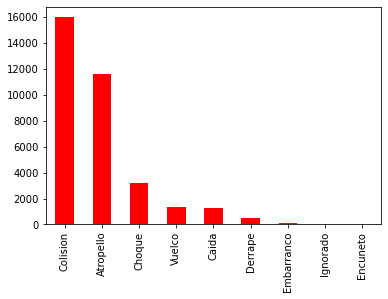

In [17]:
accidente_comun.plot(kind='bar', color='red')

Se puede observar que el tipo de accidente más común en los ultimos 4 años, es decir del 2015 al 2019, es la **colisión**.

#### Pregunta No. 2 ¿Que año tiene más accidentes?

In [18]:
ano_ocurencia = dataF['año_ocu'].value_counts()
print(ano_ocurencia)

2016    7756
2019    7183
2015    6702
2018    6511
2017    5931
Name: año_ocu, dtype: int64


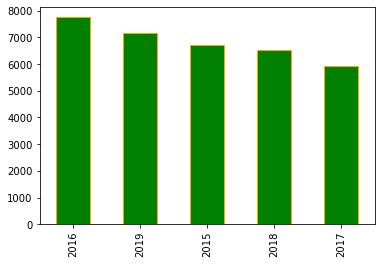

In [19]:
ano_ocurencia.plot(kind='bar', color='green', edgecolor='orange')

El año con mayor cantidad de accidentes es **2016** el cual registra 7756 accidentes en total.

#### Pregunta No. 3 ¿Cuanto fallecidos y lesionados hay en General?

In [20]:
dataF['fall_les'].value_counts()

Lesionado    26606
Fallecido     7474
Ignorado         3
Name: fall_les, dtype: int64

Se puede observar que la cantidad de lesionados es mayor a los fallecidos.

#### Pregunta No. 4 ¿Cuanto de los Fallecidos fueron por Colision?

Agrupamos los datos, entre fallecidos y el tipo de choque que queremos, en este caso se tomo el tipo **colision** debido a que es el que más se encuentran registrados

In [21]:
FC =dataF.loc[(dataF['fall_les'] == 'Fallecido') & (dataF['tipo_eve'] == 'Colision')] #Fallecidos por Colision
cantidadFallecidosColision = FC['fall_les'].value_counts()
cantidadFallecidosColision

Fallecido    2400
Name: fall_les, dtype: int64

Se observa que la cantidad de fallecidos durante un accidente causado por colision, es de **2400**. Procederemos a verificar sacando la cantidad de Lesionados, y luego sumar ambos datos, y observar si es la misma cantidad que tenemos registrada.

In [22]:
LC =dataF.loc[(dataF['fall_les'] == 'Lesionado') & (dataF['tipo_eve'] == 'Colision')]
cantidadLesionadosColision = LC['fall_les'].value_counts()
cantidadLesionadosColision

Lesionado    13592
Name: fall_les, dtype: int64

Verificamos que la cantidad sea la misma encontrados anteriormente, en la Pregunta No. 1 

In [23]:
#relacion con la Pregunta No. 1
verificacionData = dataF['tipo_eve'].value_counts()

print('Cantidad de Colision: ', cantidadFallecidosColision[0] + cantidadLesionadosColision[0])
print('Cantidad de Colision: ', verificacionData[0])

Cantidad de Colision:  15992
Cantidad de Colision:  15993


#### Pregunta No. 5 ¿Cuales son los tipos de Vehiculos que frecuencias más accidentes?

Utilizando los diccionarios vamos a identificar cada tipo de vehiculos

In [24]:
tipo_vehiculo = dataF['tipo_veh'].value_counts()
print(tipo_vehiculo)

Motocicleta        16384
Automovil           5194
Pick Up             3573
Ignorado            2915
Camioneta Sport     1419
Camion              1146
Bus Urbano           836
Microbus             767
Moto Taxi            639
Cabezal              477
Bus extraurbano      209
Panel                188
Bicicleta            145
Taxi                  66
Cuatrimoto            46
Jeep                  39
Tractor               24
Grua                   8
Bus Escolar            3
Furgoneta              2
Montacarga             2
Bus Militar            1
Name: tipo_veh, dtype: int64


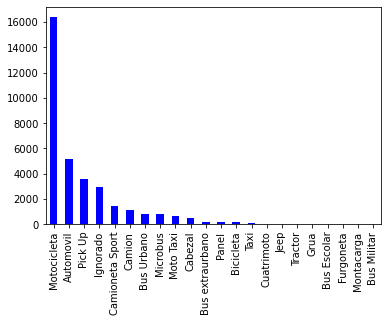

In [25]:
tipo_vehiculo.plot(kind='bar', color='blue')

En el analisis anterior, se observa que el vehiculos que más presenta accidentes es **motocicleta**, y es notable con lo que se puede observar en la actualidad, un incremento de motocicletas

#### Pregunta No. 6 ¿Departamento con más accidentes?

In [26]:
departament_more = dataF['depto_ocu'].value_counts()
print(departament_more)

Guatemala         12596
Escuintla          2685
Alta Verapaz       1461
Chimaltenango      1388
Izabal             1287
Peten              1203
Suchitepequez      1197
Santa Rosa         1158
Sacatepequez       1117
Zacapa             1116
Quetzaltenango     1065
Retalhuleu          945
Jutiapa             923
Chiquimula          865
El Progreso         848
San Marcos          740
Huhuetenango        722
Quiche              700
Solola              680
Baja Verapaz        624
Jalapa              462
Totonicapan         301
Name: depto_ocu, dtype: int64


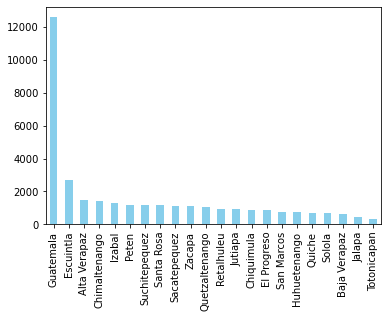

In [27]:
departament_more.plot(kind='bar', color='skyblue')

Se puede observar que el departamento que más accidente detecta es **GUATEMALA**, y es por que es donde mayor población hay dentro del pais. El segundo departamento es **ESCUINTLA** por se el más cercano al primero en greografía, muchos de las personas viajan.

#### Pregunta No. 7 ¿Cuantos fallecidos hay en el Departamento de Guatemala?

In [28]:
#Fallecidos por Guatemala
fallecidoGuatemala = dataF.loc[(dataF['fall_les'] == 'Fallecido') & (dataF['depto_ocu'] == 'Guatemala')]
fallecidosGT = fallecidoGuatemala['fall_les'].value_counts()
print(fallecidosGT)
#verificacion
verificacionData = dataF['depto_ocu'].value_counts()
print('Cantidad en porcentaje: ', (fallecidosGT[0]/verificacionData[0])*100)

Fallecido    1853
Name: fall_les, dtype: int64
Cantidad en porcentaje:  14.71101937122896


Se observa que los numeros de fallecidos en el departamento de Guatemala es **1853** que representa 15% de los accidentes que hay dentro de los departamentos.

Verificamos si el dato encontrado se relaciona con los datos de las Pregunta No. 6 de accidentes dentro del Departamento

In [29]:
lesionadoGuatemala = dataF.loc[(dataF['fall_les'] == 'Lesionado') & (dataF['depto_ocu'] == 'Guatemala')]
lesionadoGT = lesionadoGuatemala['fall_les'].value_counts()
lesionadoGT

Lesionado    10742
Name: fall_les, dtype: int64

In [30]:
#Relacion con los datos
verificacionData = dataF['depto_ocu'].value_counts()

print('Cantidad de Fallecidos: ', fallecidosGT[0] + lesionadoGT[0])
print('Cantidad de Fallecidos Verificación: ', verificacionData[0])

Cantidad de Fallecidos:  12595
Cantidad de Fallecidos Verificación:  12596
